<a href="https://colab.research.google.com/github/jaya3126/Decision-Tree-/blob/main/company_decsion_tree_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Company_Data.csv")
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.shape

(400, 11)

In [13]:
encoder = LabelEncoder()
data["Urban"] = encoder.fit_transform(data["Urban"])
data["US"] = encoder.fit_transform(data["US"])
data["ShelveLoc"] = encoder.fit_transform(data["ShelveLoc"])

In [14]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [15]:
import seaborn as sns

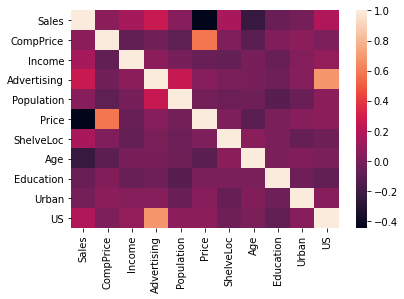

In [16]:
# correlation matrix
sns.heatmap(data.corr())

In [17]:
X = data.iloc[:,1:]
y = data['Sales']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [19]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
y_predict = model.predict(X_test)

In [21]:
y_predict

array([ 6.40428571,  2.54571429,  9.25822222,  5.4032    ,  6.84856061,
        5.4032    , 12.05272727,  6.40428571,  9.25822222,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  9.25822222,
        9.74541667,  9.25822222, 12.05272727,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  5.4032    ,  6.84856061,  5.4032    ,
        6.84856061,  6.84856061,  6.40428571,  6.84856061,  6.84856061,
        9.25822222,  9.25822222,  6.84856061,  5.4032    ,  9.25822222,
        6.84856061,  5.4032    ,  6.84856061,  9.25822222,  5.4032    ,
        2.54571429,  6.84856061,  9.74541667, 12.05272727,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  6.84856061,  9.25822222,  6.84856061,
        5.4032    ,  6.84856061,  9.25822222, 12.05272727,  9.25822222,
        9.25822222,  9.25822222,  9.9175    ,  6.84856061,  6.84856061,
        6.84856061,  9.25822222,  6.84856061,  5.4032    ,  9.25

In [22]:
pd.crosstab(y_test,y_predict)

col_0,2.545714,5.403200,6.404286,6.848561,9.258222,9.745417,9.917500,12.052727
Sales,,,,,,,,
0.91,0,1,0,0,0,0,0,0
2.23,0,1,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0
3.02,0,0,1,0,0,0,0,0
3.07,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,1,0,0,0
13.55,0,0,0,0,0,0,0,1
13.91,0,0,0,0,0,0,0,1


In [23]:
model.score(X_test,y_test)

0.5263023772875566

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, model.predict(X_test))

4.016841281436861

In [26]:
label = X_test.columns
label

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

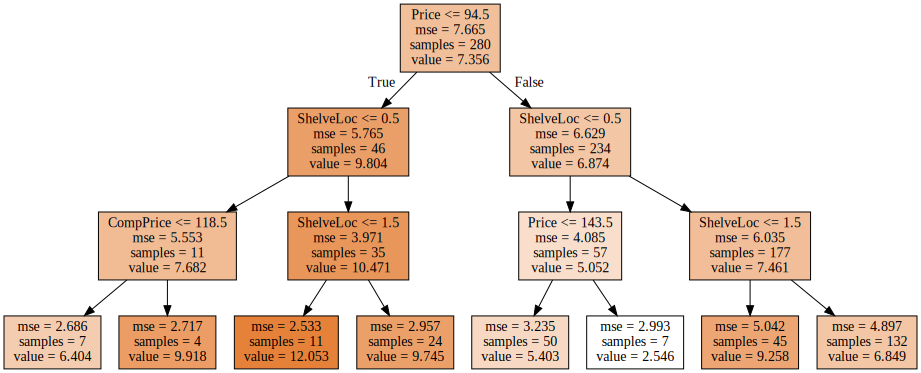

In [27]:
graph = Source(tree.export_graphviz(model ,feature_names = label, max_depth = 3, filled = True))
display(SVG(graph.pipe(format='svg')))

This tree looks very similar to the classification tree. The main difference is that instead of predicting a class in each node, it predicts a value. 


# Decsion Tree classifier

In [29]:
data1 = pd.read_csv("Company_Data.csv")
data1.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [31]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
data1[sale_val] = data1['Sales'].apply(lambda Sales:'')

Here i am going to divid data in two part below the mean value is low sales and above is high sales

In [33]:
data1['status'] = data1['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')

In [34]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [35]:
data1.drop(['Sales'],inplace=True,axis=1)

In [42]:
data1.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
status         object
dtype: object

In [56]:
encoder = LabelEncoder()
for i in data1.columns:
  print(i)
  if data1[i].dtypes == object:
    data1[i] = encoder.fit_transform(data1[i])
  else:
    pass

CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
status


In [57]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


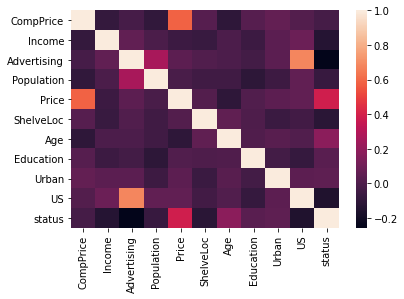

In [58]:
sns.heatmap(data1.corr())

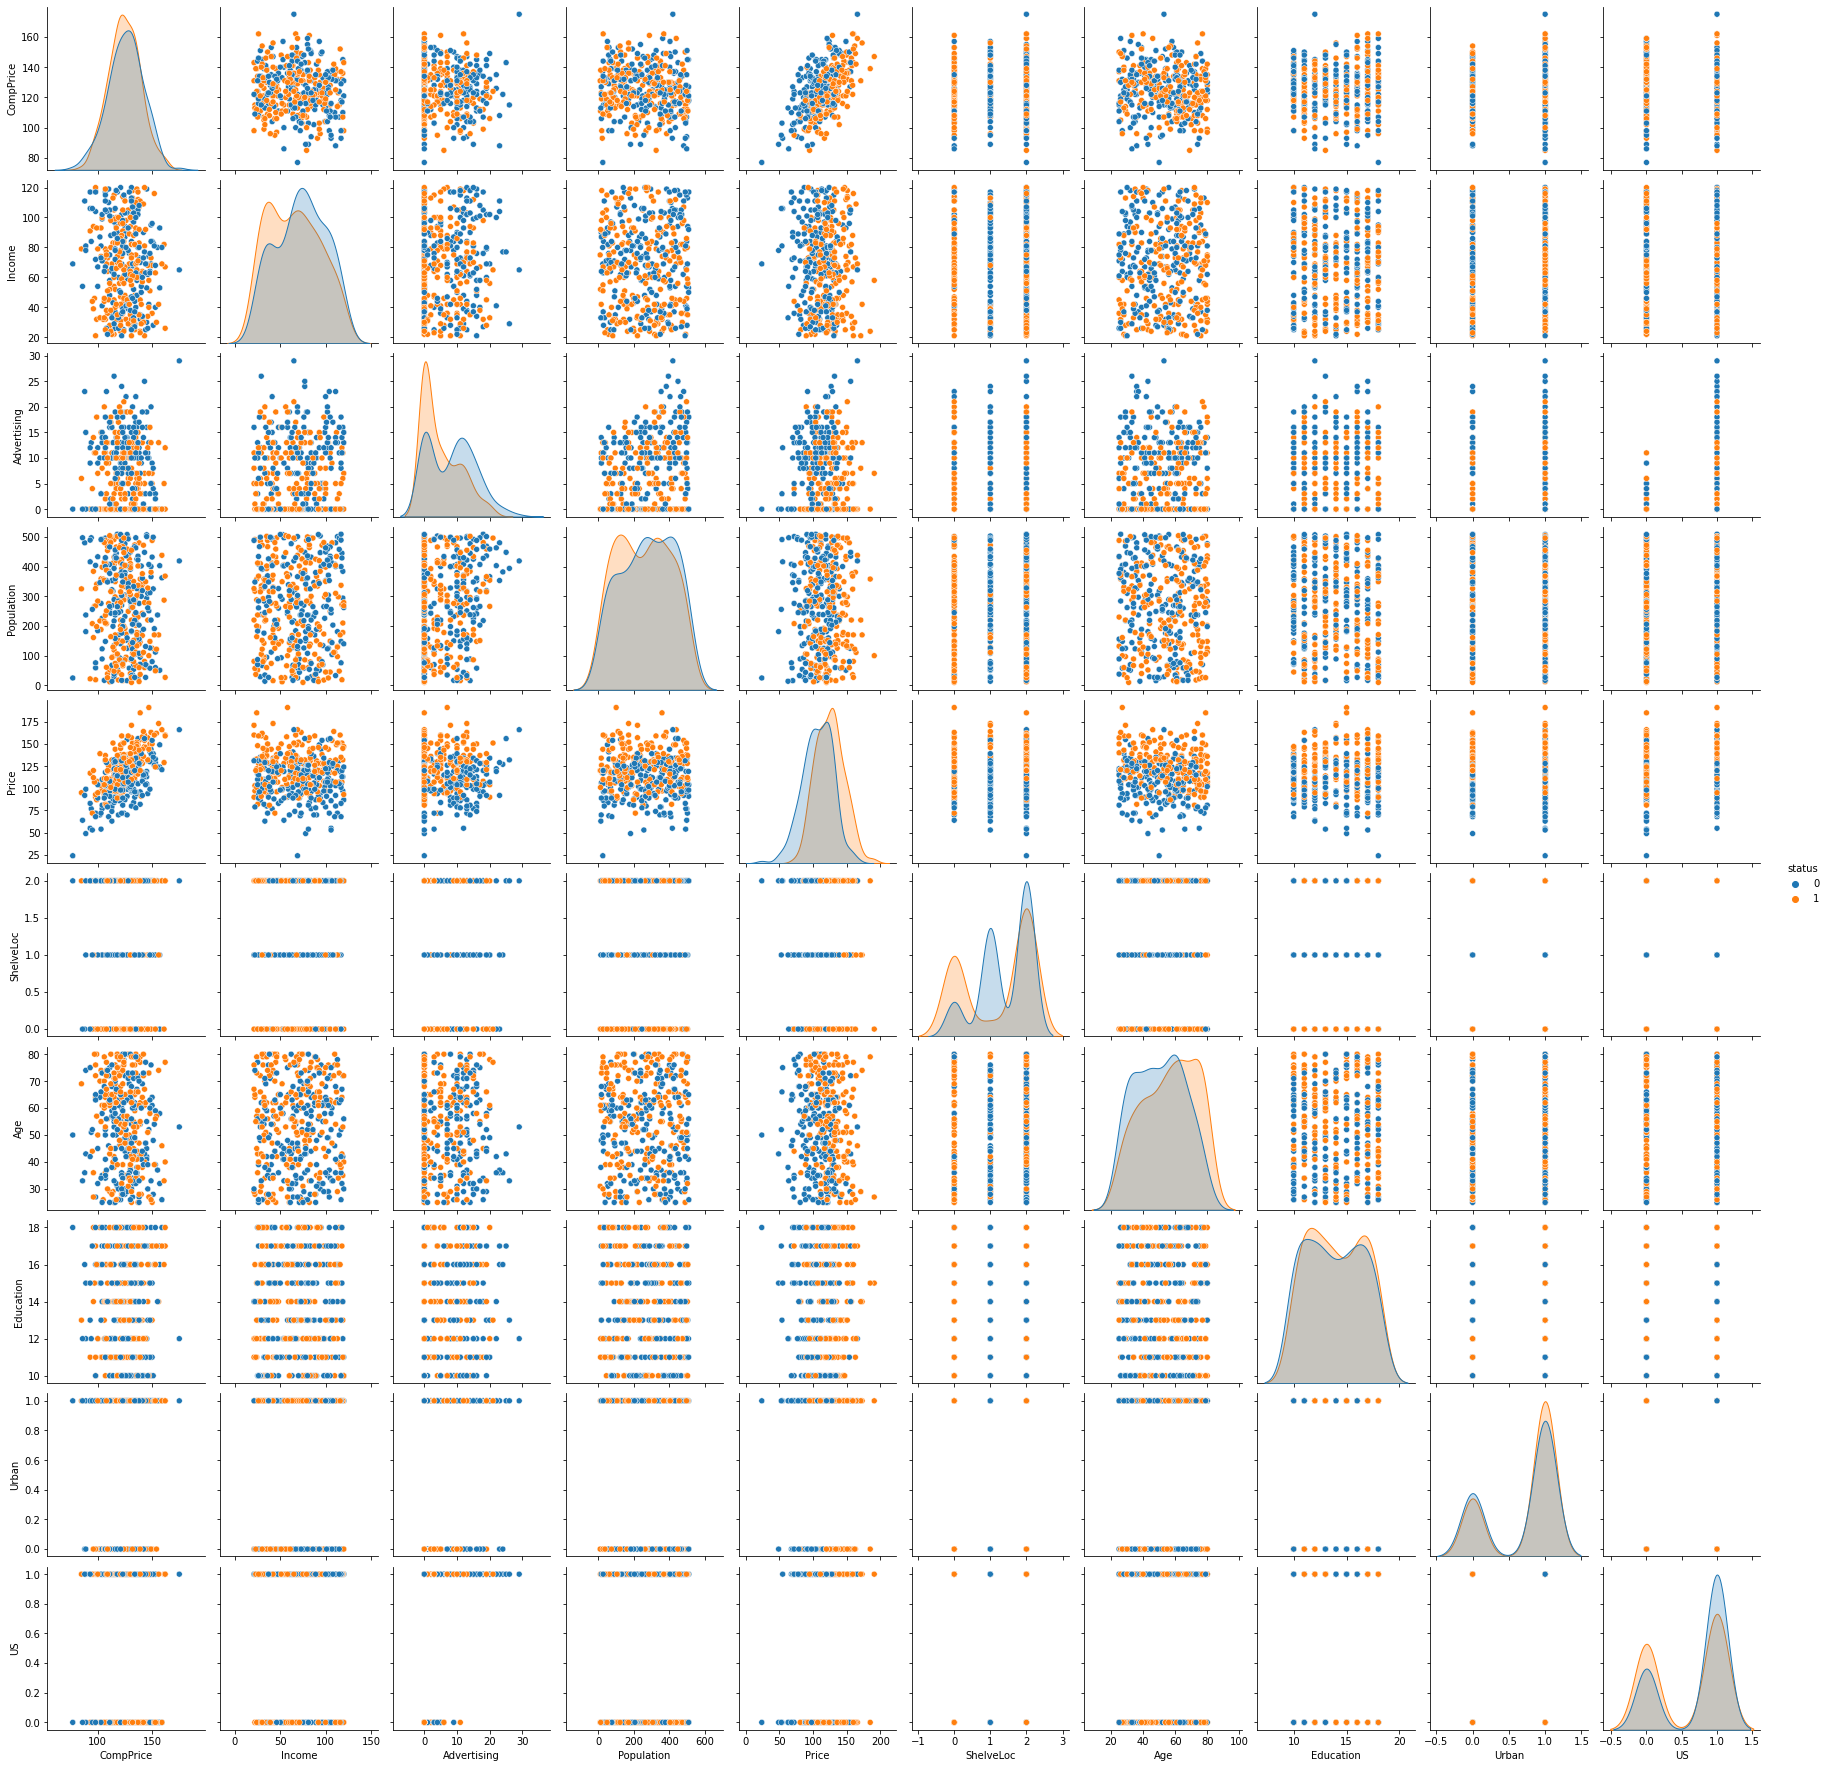

In [59]:
sns.pairplot(data1,hue='status')

In [64]:
X1 = data1.iloc[:,0:10]
y1 = data1.iloc[:,10]


In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.3,random_state = 42)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model_en = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model_en.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [73]:
Preds = model_en.predict(X_test)
Preds

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [77]:
np.mean(Preds==y_test1)

0.675

In [79]:
print(classification_report(y_test1,Preds))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        65
           1       0.70      0.51      0.59        55

    accuracy                           0.68       120
   macro avg       0.68      0.66      0.66       120
weighted avg       0.68      0.68      0.67       120



In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
print(confusion_matrix(y_test1,Preds))

[[53 12]
 [27 28]]


[Text(153.45000000000002, 190.26, 'X[4] <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(55.800000000000004, 81.53999999999999, 'X[3] <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]'),
 Text(167.4, 81.53999999999999, 'X[6] <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(279.0, 81.53999999999999, 'X[4] <= 135.5\nentropy = 1.0\nsamples = 1

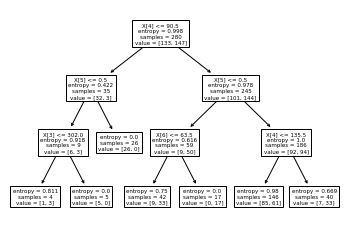

In [78]:
tree.plot_tree(model_en)

[Text(1065.625, 1981.875, 'Price <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]\nclass = High'),
 Text(581.25, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]\nclass = Low'),
 Text(387.5, 849.375, 'Population <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = Low'),
 Text(193.75, 283.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = High'),
 Text(581.25, 283.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Low'),
 Text(775.0, 849.375, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = Low'),
 Text(1550.0, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]\nclass = High'),
 Text(1162.5, 849.375, 'Age <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]\nclass = High'),
 Text(968.75, 283.125, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]\nclass = High'),
 Text(1356.25, 283.125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = High'),
 Text(1937.5, 849.375, 'Price <= 135.5\n

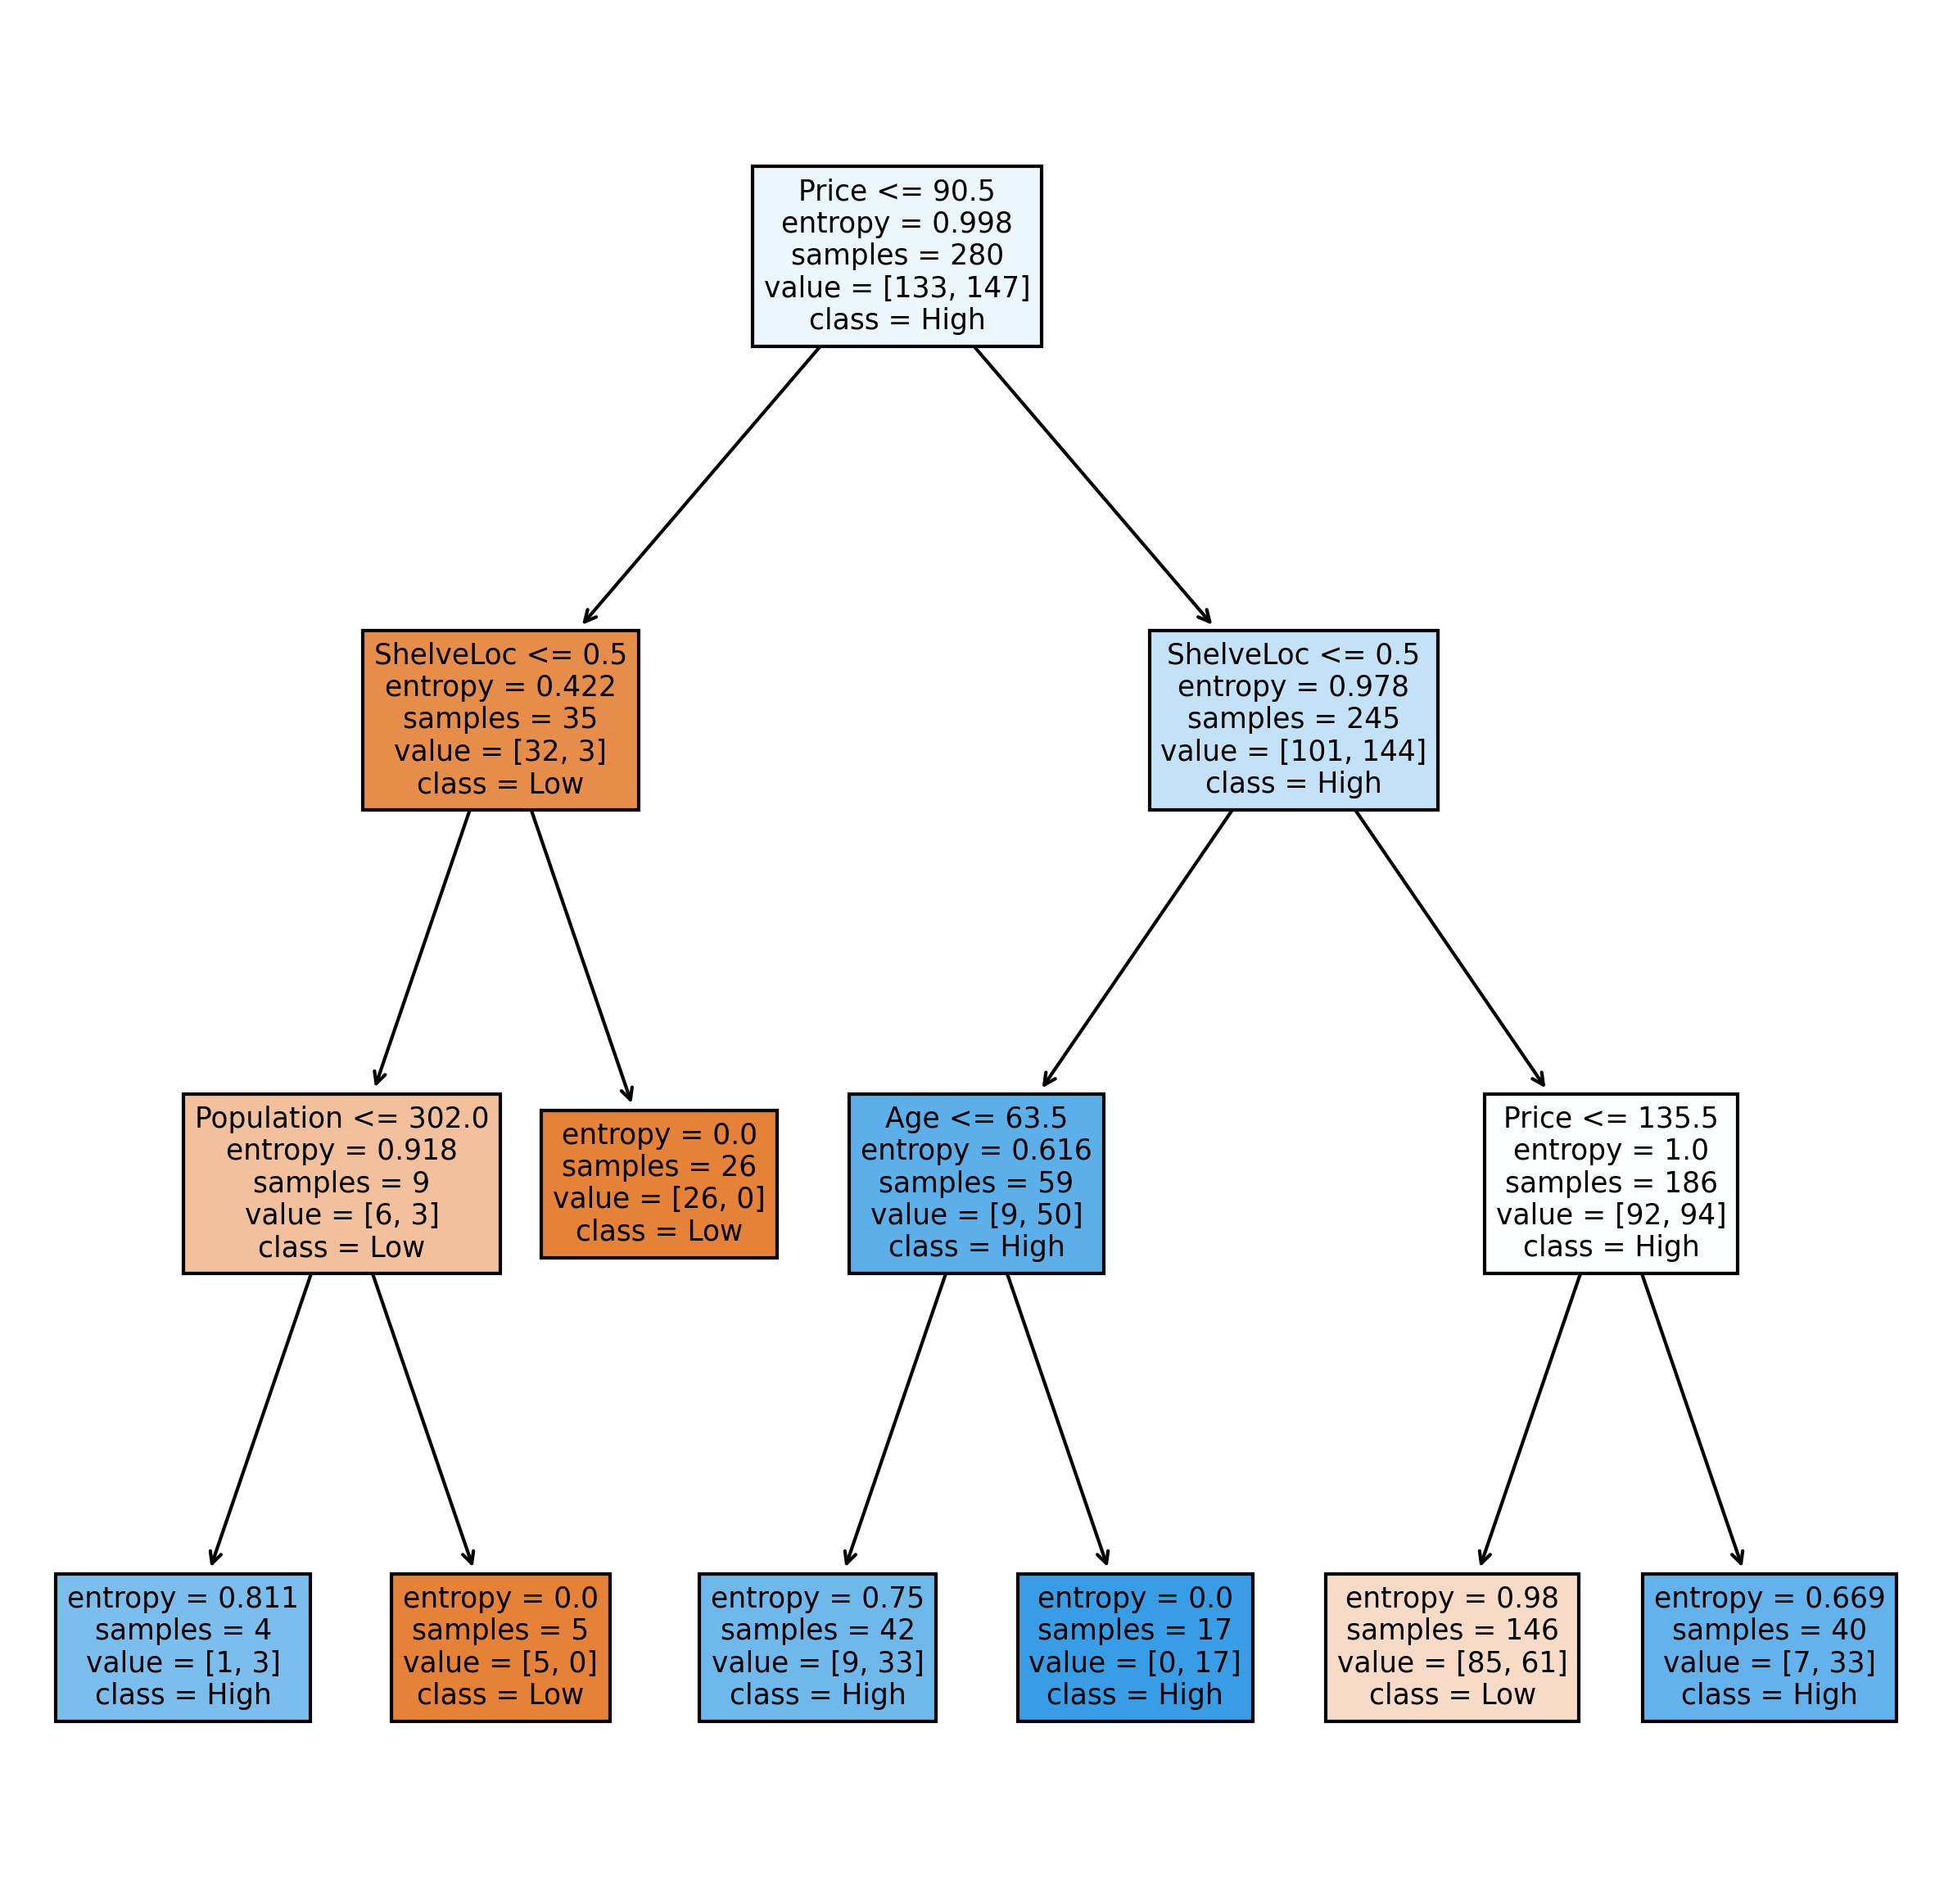

In [87]:
fn = data1.columns
cn = ['Low','High']
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model_en,feature_names=fn,class_names=cn,filled=True)


Decision classifier model accuracy is not good it is 66% so model is ok to predict value.
and Decision tree regression model accurcy is 52 % its very less.
so for this data classifier method is good.